In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
dataset=pd.read_csv('/content/Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [ ]:
dataset.head()

Data Cleaning


In [ ]:
dataset[dataset.isnull().any(axis=1)]

In [ ]:
dataset.loc[:122,"Region"]=0
dataset.loc[122:,"Region"]=1
df=dataset

In [ ]:
df.info()

In [ ]:
df[["Region"]]=df[["Region"]].astype(int)

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df=df.dropna().reset_index(drop=True)

In [ ]:
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
df.iloc[[122]]

In [ ]:
df=df.drop(122).reset_index(drop=True)

In [ ]:
df.iloc[[122]]

In [ ]:
df.columns

Fixing name in column names

In [ ]:
df.columns=df.columns.str.strip()
df.columns

Chaning required columns as integers

In [ ]:
df[['month','day','year','Temperature','RH','Ws']]=df[['month','day','year','Temperature','RH','Ws']].astype(int)

In [ ]:
df.info()

Chaning required columns to float

In [ ]:
df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']]=df[['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.to_csv('Algerian_forest_cleaned_dataset',index=False)

EDA

In [ ]:
df_copy=df.drop(['day','month','year'],axis=1)

In [ ]:
df_copy.head()

In [ ]:
df_copy['Classes'].value_counts()

In [ ]:
df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [ ]:
df_copy.head()

In [ ]:
df_copy['Classes'].value_counts()

In [ ]:
plt.style.use('seaborn')
df_copy.hist(bins=50,figsize=(20,15))

Pie chart

In [ ]:
percentage=df_copy['Classes'].value_counts(normalize=True)*100

Text(0.5, 1.0, 'Pie chart of Classes')

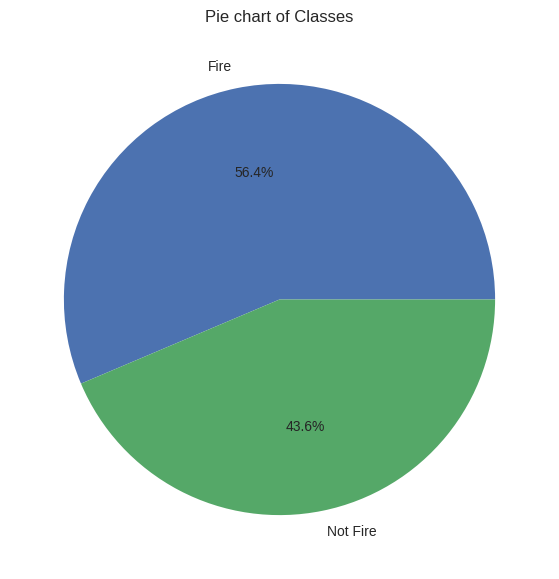

In [ ]:
classlabels=["Fire","Not Fire"]
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title("Pie chart of Classes")

In [ ]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

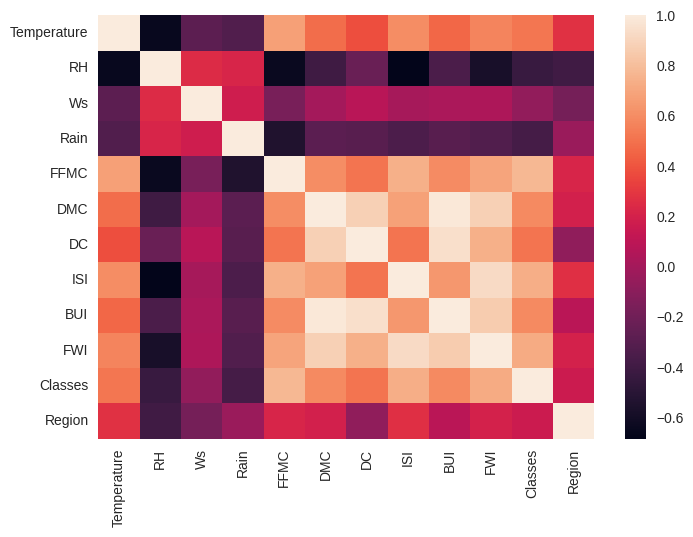

In [ ]:
sns.heatmap(df_copy.corr())

<Axes: ylabel='FWI'>

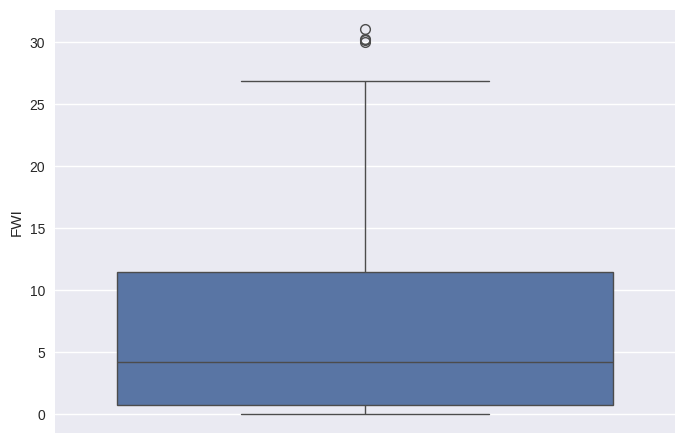

In [ ]:
sns.boxplot(df['FWI'])

Monthly Fire Analysis

Text(0.5, 1.0, 'Fire analysis of Sidi-Bel regions')

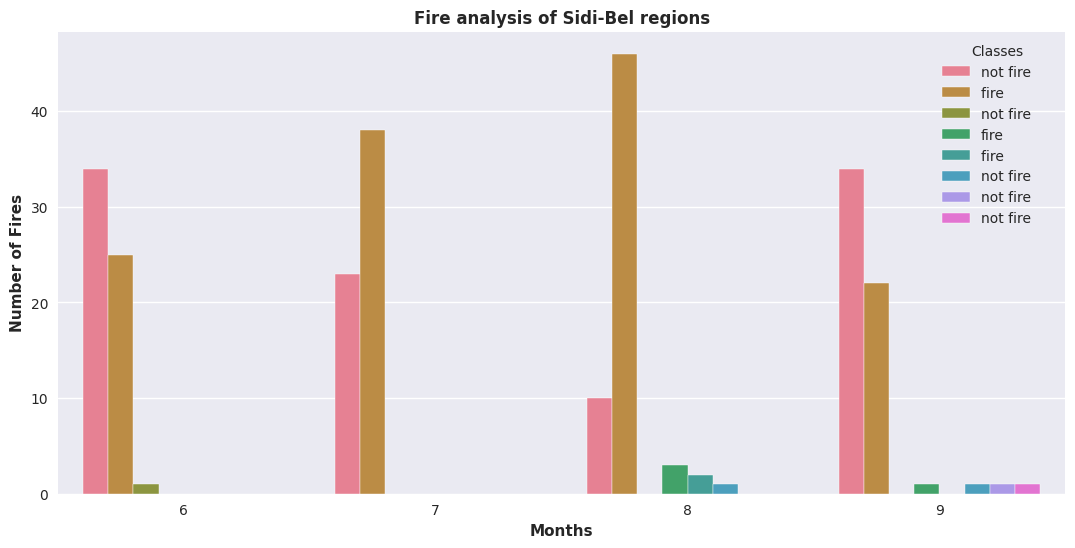

In [ ]:

dftemp=df.loc[df["Region"]==1]
plt.subplots(figsize=(13,6))
sns.set_style("whitegrid")
sns.countplot(x="month",hue="Classes",data=df)
plt.ylabel("Number of Fires",weight="bold")
plt.xlabel("Months",weight="bold")
plt.title("Fire analysis of Sidi-Bel regions",weight="bold")

Text(0.5, 1.0, 'Fire analysis of Bejja regions')

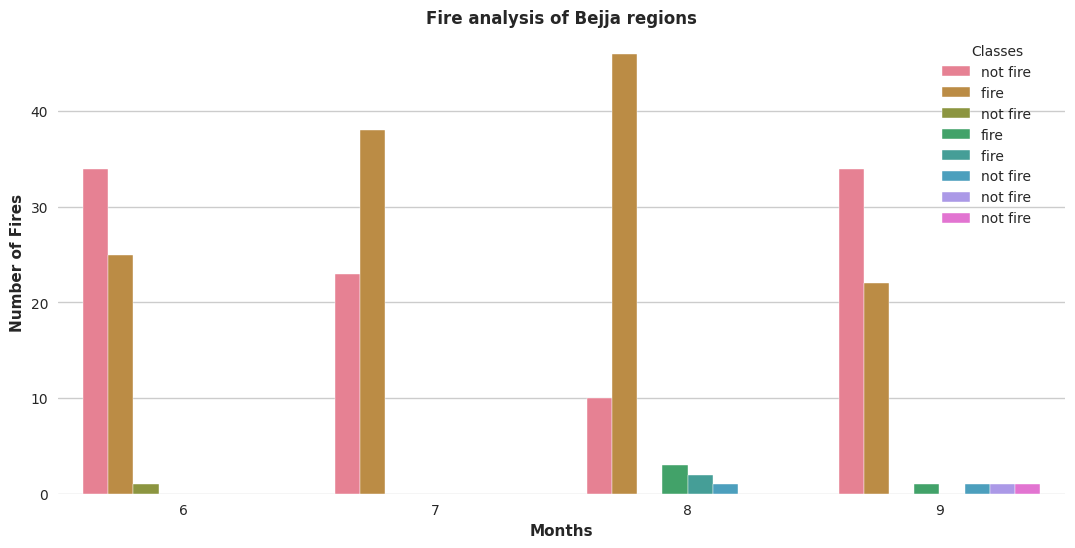

In [ ]:

dftemp=df.loc[df["Region"]==0]
plt.subplots(figsize=(13,6))
sns.set_style("whitegrid")
sns.countplot(x="month",hue="Classes",data=df)
plt.ylabel("Number of Fires",weight="bold")
plt.xlabel("Months",weight="bold")
plt.title("Fire analysis of Bejja regions",weight="bold")